In [166]:
from sklearn.linear_model import Ridge
import numpy as np
import sklearn.datasets
from sklearn import linear_model
import sklearn.cross_validation
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import ensemble
import time
import random



In [5]:
import cv2
import tqdm


# Getting the function to obtain matrix from images


In [213]:
def get_list_image(imagepath): 
    import os
    folder_path=imagepath
    image_list=[]
    for filename in os.listdir(folder_path):
        if(filename.endswith('.jpg') | filename.endswith('.jpeg') | filename.endswith('.png')):
        #it will open the filename
            #f=open(folder_path + '/' + filename)
            #print f
            image=cv2.imread(folder_path + '/' + filename)
            
            #image=cv2.imread(os.path.join(folder_path,filename))
            image_list.append(image)
    return image_list

In [214]:
#np.shape(train_jar[6])
jar='/Users/s0c01xa/Documents/Jar Images'
non_jar='/Users/s0c01xa/Documents/Non Jar images'


In [215]:
train_jar=get_list_image(jar)
train_nonjar=get_list_image(non_jar)


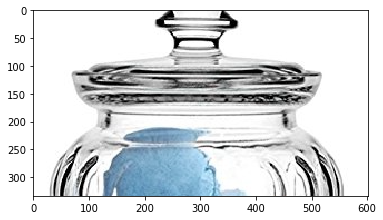

In [687]:
plt.imshow(train_nonjar[10])
plt.show()
#len(train_nonjar)
#np.shape(train_jar[0])
#np.shape(train_jar)

# y_jar is encoded as 1 ,   #y_nonjar is encoded as 0

In [220]:
y_jar= np.array([1]*len(train_jar))
y_nonjar=np.array([0]*len(train_nonjar))


In [551]:
#type(y_jar)
#np.shape(train_jar[0])

# Converting the images and resizing it using CV2

In [194]:
def get_same_size_image(img_list):
    res_image_list=[]
    for i in range(0,len(img_list)):
        resized_image=cv2.resize(img_list[i],(200,200))
        res_image_list.append(resized_image)
    return res_image_list

In [221]:
#plt.imshow(Res_train_jar[1])
#plt.show()
resized_train_jar=get_same_size_image(train_jar)
resized_train_nonjar=get_same_size_image(train_nonjar)

In [563]:
np.shape(resized_train_jar[0])

(200, 200, 3)

In [196]:
def get_image_plotted(image,i):
    plt.imshow(image[i])
    plt.show()


# Converting to grey scale

In [222]:
def get_gray_image(image_list):
    gray_image=[]
    for i in range(0,len(image_list)):
        gray=cv2.cvtColor(image_list[i], cv2.COLOR_BGR2GRAY)
        gray_image.append(gray)
    return gray_image



In [223]:
gray_jar=get_gray_image(resized_train_jar)
gray_non_jar=get_gray_image(resized_train_nonjar)

In [118]:
#np.shape(gray_jar[0])
#plt.imshow(gray_jar[5])
#plt.show()

# Extracting HOG FeaturesPython


In [224]:
#get_image_plotted(resized_train_nonjar,10)

from skimage import feature
H = feature.hog(gray_jar[0], orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
np.shape(H)



(20736,)

# PREPARING THE HOG FEATURE VECTORS

In [225]:
def get_hog_feature_array(image_list):
    hog_feat_arr=np.zeros((len(image_list),20736))
    from skimage import feature
    for i in range(0,len(image_list)):
        H = feature.hog(image_list[i], orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
        hog_feat_arr[i]=H
        
    return hog_feat_arr
    

In [226]:
jar_hog_feat=get_hog_feature_array(gray_jar)
nonjar_hog_feat=get_hog_feature_array(gray_non_jar)


In [564]:
len(jar_hog_feat[12])


20736

# Plotting how HOG IMAGE WORKS

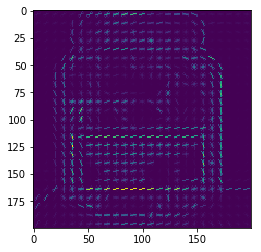

In [565]:
from skimage import exposure
from skimage import feature
import cv2
 
#H- it saves the HOG feature vector and hogImage


(H, hogImage) = feature.hog(gray_jar[12], orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2",
                            visualise=True)

hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")
 
plt.imshow(hogImage)
plt.show()

In [567]:
#plt.imshow(train_jar[12])
#plt.show()

In [389]:
#print np.count_nonzero(H!=0)
#H
#print np.count_nonzero(H==0)

# Creating Training Predictor and Response

In [234]:
train_x= np.concatenate((jar_hog_feat, nonjar_hog_feat), axis=0)
train_y=np.concatenate((y_jar, y_nonjar), axis=0)
#np.shape(train_x)
#np.shape(train_y)


# SVM MODEL ON HOG FEATURES

In [276]:
from sklearn.svm import SVC
svc=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.006, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)
svc.fit(train_x,train_y) 
#score=svc.score(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.006, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)

In [277]:
cross_val_score(svc,train_x,train_y,cv=10)

array([ 0.72      ,  0.8       ,  1.        ,  0.96      ,  0.95833333,
        1.        ,  0.95652174,  1.        ,  0.73913043,  0.60869565])

# TESTING ON SAMPLE DATA

In [730]:
#test_path='/Users/s0c01xa/Desktop/Screen Shot 2018-04-24 at 11.41.47 AM.png'
#test_path='/Users/s0c01xa/Desktop/Screen Shot 2018-04-24 at 11.50.41 AM.png'
#test_path='/Users/s0c01xa/Desktop/Screen Shot 2018-04-24 at 11.52.08 AM.png'
#test_path='/Users/s0c01xa/Desktop/Screen Shot 2018-04-24 at 11.53.36 AM.png'
#test_path='/Users/s0c01xa/Desktop/Screen Shot 2018-04-24 at 11.57.33 AM.png'
#test_path='/Users/s0c01xa/Desktop/Screen Shot 2018-04-24 at 12.16.09 PM.png'
#test_path='/Users/s0c01xa/Desktop/Screen Shot 2018-04-24 at 11.09.38 AM.png'
test_path='/Users/s0c01xa/Desktop/Screen Shot 2018-04-25 at 11.31.18 AM.png'





test_image = cv2.imread(test_path)
test_image_res=cv2.resize(test_image,(200,200))
test_image_gray=cv2.cvtColor(test_image_res, cv2.COLOR_BGR2GRAY)


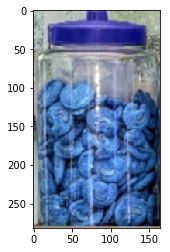

In [731]:
plt.imshow(test_image)
plt.show()

In [487]:
#plt.imshow(image)
#plt.show()
from skimage import feature
H = feature.hog(test_image_gray, orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")

In [300]:
#plt.imshow(test_image_gray)
#plt.show()

# Plotting the test data

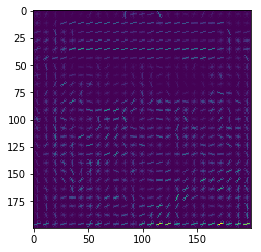

In [732]:
#len(H)
from skimage import exposure
from skimage import feature
import cv2
 
#H- it saves the HOG feature vector and hogImage


(H_test, hogImage) = feature.hog(test_image_gray, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2",
                            visualise=True)

hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")
 
plt.imshow(hogImage)
plt.show()


In [397]:
#np.count_nonzero(H_test)

# Predicting based on Linear SVM

In [733]:
np.shape(H_test)
H_test=H_test.reshape(-1,1).T
pred=svc.predict(H_test)

# pred '1' indicates that it has correctly predicted a jar

In [737]:
svc.predict_proba(H_test)
#pred

array([[ 0.09108307,  0.90891693]])

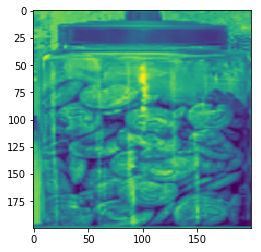

In [735]:
plt.imshow(test_image_gray)
plt.show()

In [ ]:
#Once the prediction is done using a test image, it is time to take the 

In [265]:
#plt.imshow(test_image_gray)
#plt.show()

# HOG SLIDING WINDOW DEFINATION

In [29]:
test_path='/Users/s0c01xa/Desktop/Kitchen.png'

In [ ]:
#Function returning the values

In [365]:
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
        for y in range(0, image.shape[0], stepSize):
            for x in range(0, image.shape[1], stepSize):
                # yield the current window
                yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])
                #plt.show()

In [ ]:
#The above function gives three things as output. (x,y,image-rectangle)

In [316]:
np.shape(test_image_gray)

(200, 200)

# DEFINING THE WINDOW SIZE

# SLIDING WINDOW IS APPLIED AND FOR EACH WINDOW,SVM IS APPLIED AND THE CORR WINDOW IS SAVED

In [694]:
windowSize=[(10,20),(15,10),(20,10),(20,40),(20,30),(30,20),(10,15),(5,10),(10,6),(16,16),(32,32),(48,48),(60,60),(90,90),(120,120),(150,150),(180,180),(200,200),(300,300)]
step_size=2
#(a,b)=(200,200)

In [670]:
#windowSize=[(2,4),(5,15),(15,25),(15,30),(20,40),(30,60),(50,80),(60,90),(70,100),(80,140),(90,150),(100,180),(10,10),(20,20),
            #(30,30),(40,40),(50,50),(100,100)]

In [671]:
#windowSize=[(37,100),(40,100),(45,110),(38,100)]

In [418]:
'''c=0
Co_ordinates=[]
for i in windowSize:
    #print i
    for (x, y, window) in sliding_window(test_image_gray, 40,i):
        #print x
        #print y
        #print window.shape[1]
        #print (window.shape[0],i[0])
        #print 'lmao'
        #print y + i[1]
        #print x + i[0]
        #print y
        #print i
        #print window.shape[0]
        #print a
        if window.shape[0] != a or window.shape[1] !=b:
            continue
            #print b
         #print np.shape(window)
        resized_img=cv2.resize(window,(200,200))
        print np.shape(resized_img)
        #plt.imshow(resized_img)
        #plt.show()
        from skimage import feature
        H = feature.hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
        #print len(H)
        data=H.reshape(-1,1).T
        #score=svc.predict(data)
        #print score
        print score
        if score==1:
            print score
            cordinates=((x, y,x + i[0],y + i[1]))
            Co_ordinates.append(cordinates)
    
#Co_ordinates saves the coordinates of the window image
    
   
   
'''

       
    

'c=0\nCo_ordinates=[]\nfor i in windowSize:\n    #print i\n    for (x, y, window) in sliding_window(test_image_gray, 40,i):\n        #print x\n        #print y\n        #print window.shape[1]\n        #print (window.shape[0],i[0])\n        #print \'lmao\'\n        #print y + i[1]\n        #print x + i[0]\n        #print y\n        #print i\n        #print window.shape[0]\n        #print a\n        if window.shape[0] != a or window.shape[1] !=b:\n            continue\n            #print b\n         #print np.shape(window)\n        resized_img=cv2.resize(window,(200,200))\n        print np.shape(resized_img)\n        #plt.imshow(resized_img)\n        #plt.show()\n        from skimage import feature\n        H = feature.hog(resized_img, orientations=9, pixels_per_cell=(8, 8),\n                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")\n        #print len(H)\n        data=H.reshape(-1,1).T\n        #score=svc.predict(data)\n        #print score\n        print score\n    

In [716]:
c=0
Co_ordinates=[]
for i in windowSize:
    #print i
    for (x, y, window) in tqdm(sliding_window(test_image, 10,i)):
        #print np.shape(window)
        gray_img=cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
        resized_img=cv2.resize(gray_img,(200,200))
        from skimage import feature
        H = feature.hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
        #print len(H)
        data=H.reshape(-1,1).T
        #print len(data.T)
        score=svc.predict(data)
        #print score
        #print score
        #print score
        if score==1:
            print score
            cordinates=((x, y,x + i[0],y + i[1]))
            Co_ordinates.append(cordinates)


6552it [01:35, 68.63it/s]
6552it [01:35, 68.81it/s]
6552it [01:35, 68.34it/s]
6552it [01:35, 68.59it/s]
6552it [01:35, 68.57it/s]
6552it [15:49,  6.90it/s]
6552it [01:37, 67.44it/s]
6552it [01:34, 69.28it/s]
6552it [01:35, 68.81it/s]
6552it [01:37, 67.33it/s]
6552it [01:37, 67.17it/s]
6552it [01:38, 66.49it/s]
6552it [01:39, 66.07it/s]
6552it [01:41, 64.47it/s]
6552it [01:43, 63.49it/s]
6552it [01:42, 63.82it/s]
6552it [07:04, 15.43it/s]
286it [00:04, 63.23it/s]

[1]
[1]


391it [00:06, 63.17it/s]

[1]
[1]


496it [00:07, 63.08it/s]

[1]


1014it [00:16, 63.34it/s]

[1]


1119it [00:17, 63.29it/s]

[1]


3401it [00:53, 63.75it/s]

[1]


3422it [00:53, 63.73it/s]

[1]


3506it [00:54, 63.75it/s]

[1]


6552it [01:42, 63.75it/s]
73it [00:01, 60.34it/s]

[1]


91it [00:01, 60.10it/s]

[1]
[1]
[1]


195it [00:03, 60.37it/s]

[1]
[1]
[1]
[1]
[1]


272it [00:04, 60.70it/s]

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


300it [00:04, 60.70it/s]

[1]
[1]
[1]


384it [00:06, 60.71it/s]

[1]
[1]
[1]
[1]
[1]
[1]


403it [00:06, 60.65it/s]

[1]
[1]
[1]


2591it [00:42, 61.34it/s]

[1]
[1]


2689it [00:43, 61.31it/s]

[1]
[1]
[1]
[1]
[1]
[1]


2794it [00:45, 61.32it/s]

[1]
[1]
[1]
[1]
[1]
[1]


2899it [00:47, 61.30it/s]

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


2934it [00:47, 61.30it/s]

[1]


2997it [00:48, 61.29it/s]

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


3102it [00:50, 61.29it/s]

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


3190it [00:52, 61.24it/s]

[1]


3208it [00:52, 61.22it/s]

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


3243it [00:52, 61.22it/s]

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


3292it [00:53, 61.21it/s]

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


3313it [00:54, 61.21it/s]

[1]
[1]
[1]
[1]
[1]
[1]


3348it [00:54, 61.22it/s]

[1]
[1]
[1]
[1]
[1]


3397it [00:55, 61.21it/s]

[1]
[1]


3418it [00:55, 61.21it/s]

[1]
[1]
[1]


6552it [01:45, 61.98it/s]


In [720]:
Co_ordinates


[(670, 20, 870, 220),
 (680, 20, 880, 220),
 (670, 30, 870, 230),
 (680, 30, 880, 230),
 (670, 40, 870, 240),
 (670, 90, 870, 290),
 (670, 100, 870, 300),
 (660, 320, 860, 520),
 (830, 320, 1030, 520),
 (660, 330, 860, 530),
 (600, 0, 900, 300),
 (830, 0, 1130, 300),
 (840, 0, 1140, 300),
 (850, 0, 1150, 300),
 (820, 10, 1120, 310),
 (830, 10, 1130, 310),
 (840, 10, 1140, 310),
 (850, 10, 1150, 310),
 (860, 10, 1160, 310),
 (580, 20, 880, 320),
 (590, 20, 890, 320),
 (600, 20, 900, 320),
 (610, 20, 910, 320),
 (620, 20, 920, 320),
 (630, 20, 930, 320),
 (640, 20, 940, 320),
 (650, 20, 950, 320),
 (660, 20, 960, 320),
 (830, 20, 1130, 320),
 (840, 20, 1140, 320),
 (850, 20, 1150, 320),
 (590, 30, 890, 330),
 (600, 30, 900, 330),
 (610, 30, 910, 330),
 (620, 30, 920, 330),
 (630, 30, 930, 330),
 (650, 30, 950, 330),
 (830, 30, 1130, 330),
 (840, 30, 1140, 330),
 (850, 30, 1150, 330),
 (820, 240, 1120, 540),
 (830, 240, 1130, 540),
 (800, 250, 1100, 550),
 (810, 250, 1110, 550),
 (820, 25

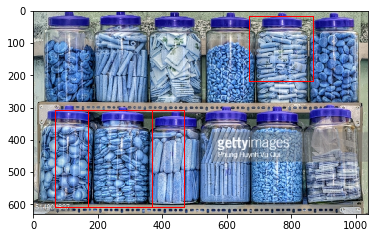

In [724]:
import cv2
clone=test_image

plt.imshow(cv2.rectangle(clone, (170, 310), (470, 610), (255,0,0), 2))
plt.show()


In [703]:
from tqdm import tqdm


In [725]:
Co_ordinates=[]

for (x, y, window) in tqdm(sliding_window(test_image, 4,(170,300))):
    
    #print np.shape(window)
    resized_img=cv2.resize(window,(200,200))
    from skimage import feature
    H = feature.hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
            cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
    #print len(H)
    data=H.reshape(-1,1).T
    #print len(data.T)
    score=svc.predict(data)
    #print score
    #print score
    #print score
    if score==1:
        print score
        cordinates=((x, y,x + 80,y + 35))
        Co_ordinates.append(cordinates)



843it [00:13, 62.57it/s]

[1]
[1]
[1]


885it [00:14, 62.57it/s]

[1]
[1]
[1]
[1]


941it [00:15, 62.56it/s]

[1]
[1]
[1]
[1]
[1]
[1]


990it [00:15, 62.53it/s]

[1]
[1]
[1]
[1]
[1]
[1]
[1]


997it [00:15, 62.54it/s]

[1]


1039it [00:16, 62.50it/s]

[1]
[1]
[1]
[1]
[1]
[1]
[1]


1088it [00:17, 62.54it/s]

[1]
[1]
[1]
[1]
[1]


1137it [00:18, 62.56it/s]

[1]
[1]
[1]
[1]
[1]


2500it [00:39, 63.25it/s]


In [727]:
Co_ordinates


[(116, 64, 196, 99),
 (120, 64, 200, 99),
 (124, 64, 204, 99),
 (112, 68, 192, 103),
 (116, 68, 196, 103),
 (120, 68, 200, 103),
 (124, 68, 204, 103),
 (112, 72, 192, 107),
 (116, 72, 196, 107),
 (120, 72, 200, 107),
 (124, 72, 204, 107),
 (156, 72, 236, 107),
 (160, 72, 240, 107),
 (108, 76, 188, 111),
 (112, 76, 192, 111),
 (116, 76, 196, 111),
 (120, 76, 200, 111),
 (124, 76, 204, 111),
 (128, 76, 208, 111),
 (156, 76, 236, 111),
 (160, 76, 240, 111),
 (112, 80, 192, 115),
 (116, 80, 196, 115),
 (120, 80, 200, 115),
 (124, 80, 204, 115),
 (128, 80, 208, 115),
 (156, 80, 236, 115),
 (160, 80, 240, 115),
 (116, 84, 196, 119),
 (120, 84, 200, 119),
 (124, 84, 204, 119),
 (156, 84, 236, 119),
 (160, 84, 240, 119),
 (120, 88, 200, 123),
 (124, 88, 204, 123),
 (152, 88, 232, 123),
 (156, 88, 236, 123),
 (160, 88, 240, 123)]

In [688]:
#resized_img=cv2.resize(window,(400,400))
#plt.imshow(resized_img)
#plt.show()

In [350]:
#plt.imshow(test_image_gray)
#plt.show()

In [549]:
#image
#plt.imshow(test_image_gray)
#plt.show()


In [550]:
#sliding_window(image, stepSize, windowSize)

In [442]:
temp = sliding_window(test_image_gray, 50, (500,400))


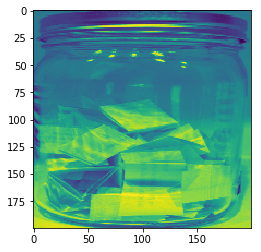

In [443]:
a=temp.next()
plt.imshow(a[2])
plt.show()

In [86]:
a1=cv2.resize(a[2],(200,200))
#plt.imshow(a1)
#plt.show()
H1=feature.hog(a1, orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")

In [63]:
svc.predict(H1.reshape(-1,1).T)

array([1])

# TEST IMAGE

In [483]:
test_image_resized=cv2.resize(test_image,(1024,1024))

# IMAGE PYRAMID

11


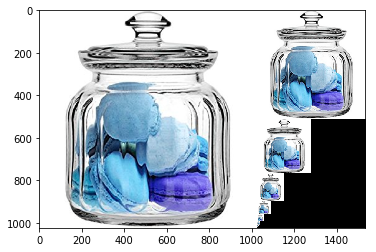

In [487]:
from skimage import data
from skimage.transform import pyramid_gaussian

#image = data.astronaut()
rows, cols, dim = test_image_resized.shape
pyramid = tuple(pyramid_gaussian(test_image_resized, downscale=2))#, multichannel=True))
print len(pyramid)

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)

composite_image[:rows, :cols, :] = pyramid[0]

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image)
plt.show()
#len(composite_image)

In [465]:
#np.shape(image)
#np.shape(test_image)

In [467]:
np.shape(pyramid)

(10,)

In [495]:
import skimage
img1=skimage.transform.pyramid_reduce(test_image_resized, downscale=2, sigma=None, order=1, 
                                 mode='reflect', cval=0)

In [497]:
img2=skimage.transform.pyramid_reduce(test_image_resized, downscale=4, sigma=None, order=1, 
                                 mode='reflect', cval=0)